## Overview

The purpose of this analysis is to understand which classification technique produces the best results on the breast cancer dataset. We will use 3 basic classification algorithms to predict breast cancer - 

- Decision Trees
- K-Nearest Neighbours
- Logistic Regression
- Support Vector Machines

### Important Packages

We will be using the scikit-learn package in python to train models for our prediction problem. We will also use matplotlib to visualize our results.

In [1]:
%matplotlib inline
from sklearn import tree, linear_model, neighbors, svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import warnings
import scikitplot as skplt
warnings.filterwarnings("ignore")

### Reading in required files

We will be using the breast cancer dataset provided by the UCI Machine learning Repository to test our algorithms.

In [2]:
# Reading the csv file
bc = pd.read_csv("wdbc_V2.csv")

In [3]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
bc.shape

(569, 33)

### Data Manipulation

From the data above, we see that M stands for Malignant and B stands for Benign. I will encode Malignant as 1 and Benign as 0 and proceed with our modelling process.

It also looks like there is one column that consists only of NaN values, which I will remove from our analysis.

In [5]:
# Splitting into independent and dependent sets
#Removing NA

bc.dropna(inplace = True, axis = 1, how = 'all')

X = bc.iloc[:,2:len(bc)]

Y = np.squeeze(bc['diagnosis'])

## Assigning Malignant as 1 and Benign as 0
Y = np.where(Y == 'M', 1,0)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Visualizing the decision boundary

I've plotted a chart below using two features - radius_mean and and compactness_mean. From this visualization, it looks like a high radius and high compactness, we can see more malginant tumors. 

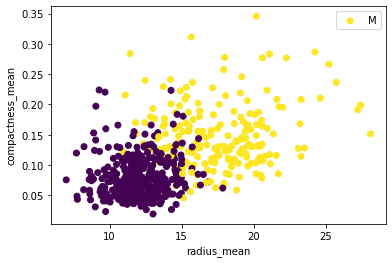

In [6]:
# Visualizing the data set 
plt.scatter(X['radius_mean'],X['compactness_mean'], c= Y)

plt.xlabel('radius_mean')
plt.ylabel('compactness_mean')
plt.legend(bc['diagnosis'])
plt.show()

## Split into train, test and validation

To avoid overfitting, we will split our data into 2 parts - train and test. Since we are using cross validation, we do not need to have a separate validation set.

We will use the validation set to select the best model from all the different hyperparameters and then finally compare the results of all 3 different models on the testing dataset to decide which model works the best.

The split that I have chosen - 

- Train = 70% 
- Test = 30%

In [7]:
#Train, test, validation split
random.seed(456)

X_train, X_test, y_train, y_test= train_test_split(X,Y, train_size=0.7, stratify = Y)


### Choose the best model out of the 4 models 

We will use nested cross-validation to select the best model out of the 4 choices we have - KNN, Decision Tree, Logistic Regression and Support Vector Machine.

We follow the steps below for each model - 

1. We select the list of parameters we want to optimize over for each model and put it into a dictionary 
2. Set up the inner cross-validation object by using this parameter grid
3. Set up the outer cross-validation object
5. Create a grid search object using the inner cv object. This will be used to find the best parameter for each outer fold.
4. Get the cross validation score using the grid search object as the estimator and the outer_cv as the cross validation parameter

In [8]:
###### Create Parameter List

## KNN
k_range = list(range(1,26))
knn_params = dict(kneighborsclassifier__n_neighbors = k_range, 
                  kneighborsclassifier__weights = ['uniform','distance'], 
                  kneighborsclassifier__p = [1,2,3])

## Decision Tree
depth_range = list(range(1,20))
min_samples_range = list(range(2,20))
impurity_decrease_range = list(np.linspace(0.1,0.5,5))

dt_params = dict(criterion = ['gini','entropy'], splitter = ['best','random'],
                 max_depth = depth_range, 
                 max_features = ['auto','sqrt','log2',None], 
                 random_state = [456],
                 min_impurity_decrease = impurity_decrease_range)

## Logistic Regression

c_range = [0.1, 1, 10, 100]
l1r_range = list(np.linspace(0,1,11))

logit_params = dict(logisticregression__penalty = ['elasticnet'],
                    logisticregression__random_state = [456],
                    logisticregression__C = c_range,
                    logisticregression__l1_ratio = l1r_range)

## Support Vector Machine

svm_params = {"svc__C": c_range,
              "svc__gamma": [0.1, 1, 10, 100],
              "svc__degree": list(range(1,5)),
              "svc__kernel": ['linear','poly','sigmoid','precomputed','rbf'],
              "svc__random_state" : [456]
            }

In [9]:
##### Set up inner and outerCV loops

inner_cv = KFold(n_splits = 5, shuffle = True, random_state = 456)
outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 456)

### Use metric

scoring = 'f1_weighted'

### Create model objects
knn = make_pipeline(MinMaxScaler(), neighbors.KNeighborsClassifier())
dt = tree.DecisionTreeClassifier()
logit = make_pipeline(StandardScaler(), 
                      linear_model.LogisticRegression(max_iter = 10000, solver = 'saga'))
svm_classifier = make_pipeline(MinMaxScaler(), svm.SVC(probability = True))

### Create Grid Search estimators

knn_gs = GridSearchCV(estimator = knn, param_grid = knn_params,
                      scoring = scoring, cv = inner_cv)
dt_gs = GridSearchCV(estimator = dt, param_grid = dt_params,
                     scoring = scoring, cv = inner_cv)
logit_gs = GridSearchCV(estimator = logit, param_grid = logit_params,
                        scoring = scoring, cv = inner_cv)
svm_gs = GridSearchCV(estimator = svm_classifier, param_grid = svm_params,
                      scoring = scoring, cv = inner_cv)

### performing Nested cross validation using the inner and outer loops
dt_score = cross_val_score(estimator = dt_gs, X = X_train, y = y_train,
                           cv = outer_cv, scoring = scoring)
knn_score = cross_val_score(estimator = knn_gs, X = X_train, y = y_train,
                            cv = outer_cv, scoring = scoring)
logit_score = cross_val_score(estimator = logit_gs, X = X_train, y = y_train,
                              cv = outer_cv, scoring = scoring)
svm_score = cross_val_score(estimator = svm_gs, X = X_train, y = y_train,
                            cv = outer_cv, scoring = scoring)

### Results of nested cross validation

From the results below, it looks like the SVM model has the highest f-1 score and performance stability across different paritions of the data. Therefore, we will go ahead with the SVM model for our predictions.

In [10]:
print("knn = " + str(np.round(knn_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(knn_score.std(),2)))
print("dt = " + str(np.round(dt_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(dt_score.std(),2)))
print("logit = " + str(np.round(logit_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(logit_score.std(),2)))
print("svm = " + str(np.round(svm_score.mean(),2)) + " " + u"\u00B1" + " "
      + str(np.round(svm_score.std(),2)))

knn = 0.96 ± 0.01
dt = 0.93 ± 0.02
logit = 0.96 ± 0.02
svm = 0.96 ± 0.01


### Training the SVM 

We will now use the entire training dataset to pick the best hyperparameters and train the model and use the test set to evaluate our model.

Looking at the report below, it seems like our model performs extremely well on the testing data with an f-1 score weighted of 0.99. 

In [11]:
## svm looks like its the best classifier of the lot

clf = svm_gs.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.98      0.97      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### Visualizing the ROC and lift curves

The report above uses the threshold of 0.5 to choose between Malignant and Benign. To get a good understanding of what threshold must be used, we should plot the ROC and lift curves to choose a better threshold.

Looking at the charts below, we can see that our model performs really well with an AUC of 0.99 which as close to perfect as it can get. 

The lift chart also shows that for up-to 40% of the sample the model predicts 2.75 times better than a random guess.

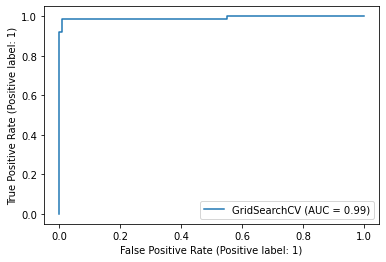

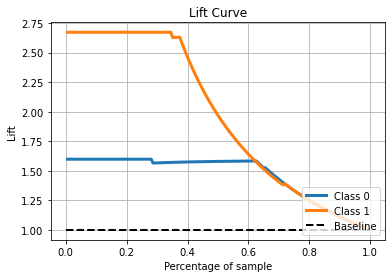

In [13]:
y_probs = clf.predict_proba(X_test)

plot_roc_curve(clf, X_test, y_test)

skplt.metrics.plot_lift_curve(y_test, y_probs)
plt.show()